# 4.10 Coding Etiquette & Excel Reporting

### Import Libraries and Dataframes

In [4]:
# Import data and libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# paths and import
path = '/Users/LuisD/Documents/CareerFoundry/01-2025 Instacart Basket Analysis'

In [8]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))


### Dealing with Personally Identifiable Information (PII)

In [10]:
# checking data PII
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_dependents', 'marital_status', 'income',
       '_merge', 'department', 'created'],
      dtype='object')

I consider as a security risk the full name of the customers. For that reason, I'm dropping 'last_name' for this analysis.

In [12]:
df = df.drop(columns=['last_name'])

### Create regional segmentation of data

In [14]:
# Assigning Northeast Region
df.loc[ df ['state'] == 'Maine', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New Hampshire', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Vermont', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Massachusetts', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Rhode Island', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Connecticut', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New York', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New Jersey', 'region'] = 'Northeast'

In [15]:
# Assigning Midwest Region
df.loc[ df ['state'] == 'Wisconsin', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Michigan', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Illinois', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Indiana', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Ohio', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'North Dakota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'South Dakota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Nebraska', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Kansas', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Minnesota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Iowa', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Missouri', 'region'] = 'Midwest'

In [16]:
# Assign South Region
df.loc[ df ['state'] == 'Delaware', 'region'] = 'South'
df.loc[ df ['state'] == 'Maryland', 'region'] = 'South'
df.loc[ df ['state'] == 'District of Columbia', 'region'] = 'South'
df.loc[ df ['state'] == 'Virginia', 'region'] = 'South'
df.loc[ df ['state'] == 'West Virginia', 'region'] = 'South'
df.loc[ df ['state'] == 'North Carolina', 'region'] = 'South'
df.loc[ df ['state'] == 'South Carolina', 'region'] = 'South'
df.loc[ df ['state'] == 'Georgia', 'region'] = 'South'
df.loc[ df ['state'] == 'Florida', 'region'] = 'South'
df.loc[ df ['state'] == 'Kentucky', 'region'] = 'South'
df.loc[ df ['state'] == 'Tennessee', 'region'] = 'South'
df.loc[ df ['state'] == 'Mississippi', 'region'] = 'South'
df.loc[ df ['state'] == 'Alabama', 'region'] = 'South'
df.loc[ df ['state'] == 'Oklahoma', 'region'] = 'South'
df.loc[ df ['state'] == 'Texas', 'region'] = 'South'
df.loc[ df ['state'] == 'Arkansas', 'region'] = 'South'
df.loc[ df ['state'] == 'Louisiana', 'region'] = 'South'

In [17]:
# Assign West Region
df.loc[ df ['state'] == 'Idaho', 'region'] = 'West'
df.loc[ df ['state'] == 'Montana', 'region'] = 'West'
df.loc[ df ['state'] == 'Wyoming', 'region'] = 'West'
df.loc[ df ['state'] == 'Nevada', 'region'] = 'West'
df.loc[ df ['state'] == 'Utah', 'region'] = 'West'
df.loc[ df ['state'] == 'Colorado', 'region'] = 'West'
df.loc[ df ['state'] == 'Arizona', 'region'] = 'West'
df.loc[ df ['state'] == 'New Mexico', 'region'] = 'West'
df.loc[ df ['state'] == 'Alaska', 'region'] = 'West'
df.loc[ df ['state'] == 'Washington', 'region'] = 'West'
df.loc[ df ['state'] == 'Oregon', 'region'] = 'West'
df.loc[ df ['state'] == 'California', 'region'] = 'West'
df.loc[ df ['state'] == 'Hawaii', 'region'] = 'West'

In [18]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependents,marital_status,income,_merge,department,created,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,beverages,both,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,both,dairy eggs,both,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,both,snacks,both,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,both,snacks,both,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,both,household,both,South


In [19]:
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### Difference in spending habits between the different U.S. regions

In [30]:
# create crosstab
crosstab = pd.crosstab (df['region'], df['spending_flag'], dropna = False)

In [31]:
# copy the crosstab to excel for easy viewing
crosstab.to_clipboard()

In [32]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


The amount of high spenders and low spenders is proportional to the total number of customers per region. So we can deduce that the area with the most large high spenders is also the area with the most customers and the area with the least total low spender customers is the area with the fewest total customers.

### Create a low-activity exclusion flag

In [35]:
# Create a flag for customers with less than 5 orders
df.loc[ df ['max_order'] <5 , 'activity_flag'] = 'low-activity customer'
df.loc[ df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [36]:
# check value counts
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [37]:
# exclude the low-activity customers from the dataframe
df = df[df['activity_flag'] == 'high-activity customer']

In [38]:
# check value counts
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
Name: count, dtype: int64

In [39]:
# export the new dataframe
df.to_pickle(os.path.join(path, '02 data' , 'prepared data' , 'high-activity_customers.pkl'))

## Create a profiling variable based on income

In [49]:
# Create an income group variable
df.loc[df['income'] <= 30000, 'income_group'] = 'low-income'
df.loc[(df['income'] > 30000) & (df['income'] <= 700000), 'income_group'] = 'middle-income'
df.loc[df['income'] > 70000, 'income_group'] = 'high-income'

In [50]:
# Check the income groups
df['income_group'].value_counts(dropna = False)

income_group
high-income      22443849
middle-income     8326583
low-income         194132
Name: count, dtype: int64

## Create a profiling variable based on age

In [54]:
df.loc[df['age'] < 25, 'age_group'] = 'youth'
df.loc[(df['age'] >= 25) & (df['age'] < 40), 'age_group'] = 'youth adult'
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age_group'] = 'middle-aged'
df.loc[df['age'] >= 60, 'age_group'] = 'senior'

In [56]:
# Check outcome for each age group
df['age_group'].value_counts(dropna = False)

age_group
senior         10574504
middle-aged     9724950
youth adult     7249916
youth           3415194
Name: count, dtype: int64

## Create a profiling variable base on dependents

In [59]:
df.loc[df['number_dependents'] == 0, 'dependents_flag'] = 'no dependents'
df.loc[df['number_dependents'] >= 1, 'dependents_flag'] = 'has dependents'

In [61]:
# Check outcome for dependents
df['dependents_flag'].value_counts(dropna = False)

dependents_flag
has dependents    23224883
no dependents      7739681
Name: count, dtype: int64

In [63]:
list(df.columns.values)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'match',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency_flag',
 'first_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_dependents',
 'marital_status',
 'income',
 '_merge',
 'department',
 'created',
 'region',
 'activity_flag',
 'income_group',
 'age_group',
 'dependents_flag']

In [65]:
df = df.drop(columns = ['_merge'])

### Bar chart - Distribution of income groups

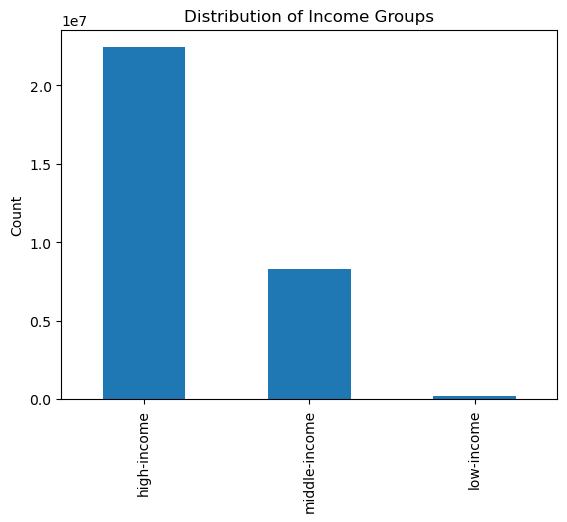

In [69]:
income_group_counts = df['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [71]:
# Export bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

### Pie chart - Distribution of age groups

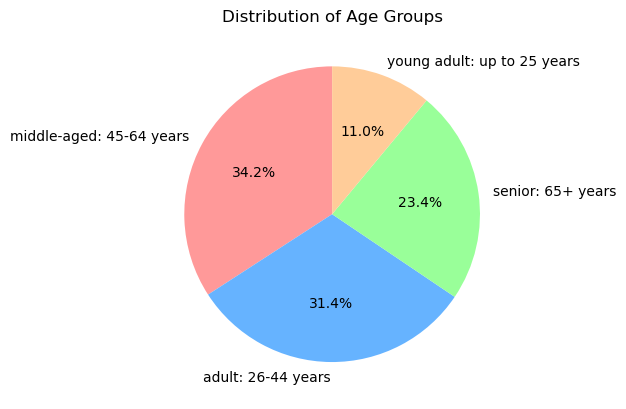

In [74]:
age_group_counts = df['age_group'].value_counts(dropna = False)
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [76]:
# Export pie chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

### Pie chart - Percentage of dependants

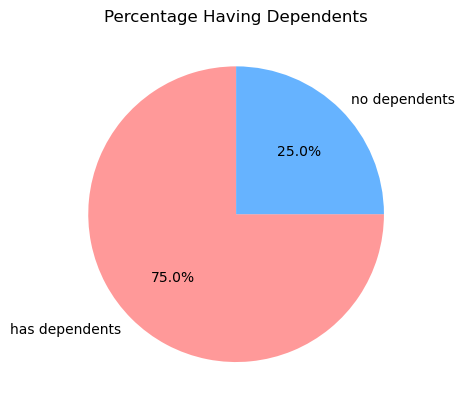

In [79]:
dependent_counts = df['dependents_flag'].value_counts(dropna = False)
dependents_pie = dependent_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependents', 'no dependents'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependents')
plt.show()

In [81]:
# Export pie chart
dependents_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'percentage_having_dependents_pie.png'))

### Regional Distribution Pie

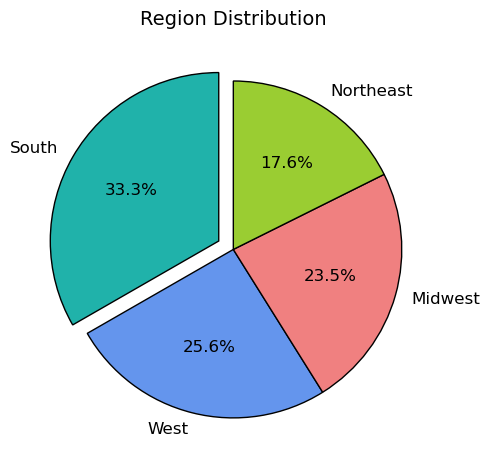

In [390]:
# Define explode values (highlighting the first slice)
explode = [0.1, 0, 0, 0]  

# Define colors for the pie chart
colors = ['lightseagreen', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Create pie chart for region distribution
region_distributions_pie = df['region'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    explode=explode, 
    startangle=90,
    wedgeprops={'edgecolor': 'black'}, 
    colors=colors,
    textprops={'fontsize': 12}  # Improve readability
)

# Improve chart aesthetics
plt.title('Region Distribution', fontsize=14, pad=10)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()  

# Export the pie chart as a high-quality PNG file
plt.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'region_distributions_pie.png'
), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Bar chart - Income groups vs usage frequency

In [377]:
path = '/Users/LuisD/Documents/CareerFoundry/01-2025 Instacart Basket Analysis'

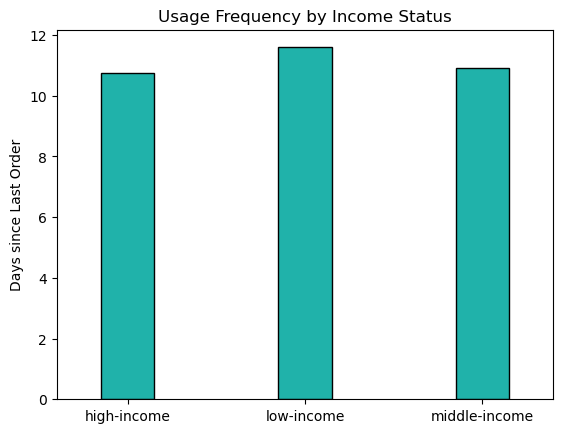

In [382]:
# Define colors for the bar chart
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Grouping by 'income_group' and calculating the mean 'days_since_prior_order'
income_group_usage_bar = df.groupby('income_group').agg({'days_since_prior_order': 'mean'})

# Plot the bar chart
income_group_usage_bar.plot.bar(
    edgecolor='black', legend=False, width=0.3, color=colors
)

# Formatting the chart
plt.title('Usage Frequency by Income Status')
plt.xlabel('', weight='black')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')

# Export the bar chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'usage_frequency_by_income1.png'), dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()

### Bar chart - Income groups vs loyalty groups

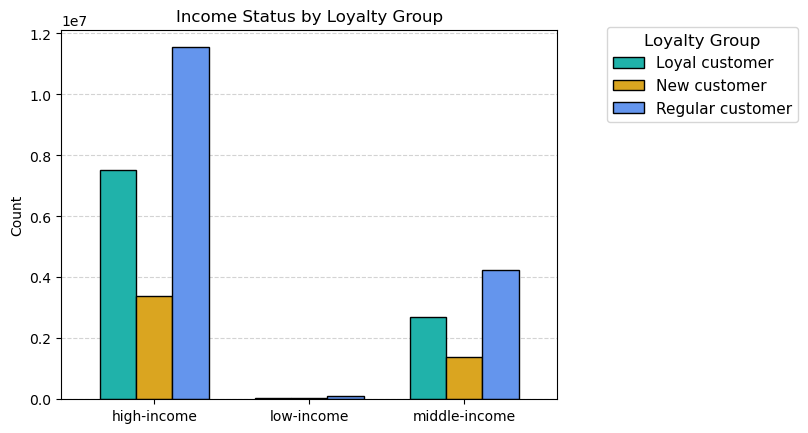

In [388]:
# Define colors for the bar chart
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue']

# Create crosstab for income group vs. loyalty flag
crosstab_income_loyalty = pd.crosstab(df['income_group'], df['loyalty_flag'], dropna=False)

# Plot the bar chart
income_loyalty_bar = crosstab_income_loyalty.plot.bar(
    color=colors, edgecolor='black', width=0.7  # Adjust bar width for better spacing
)

# Improve chart aesthetics
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Customize legend
leg = plt.legend(loc=(1.1, 0.75), title='Loyalty Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Titles and labels
plt.title('Income Status by Loyalty Group')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Export the bar chart as a high-quality PNG file
plt.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'income_group_by_loyalty_bar.png'
), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Bar chart - Loyalty Groups vs Age Groups

In [98]:
# Crosstab loyalty groups with age groups
crosstab_loyalty_age = pd.crosstab(df['loyalty_flag'], df['age_group'], dropna = False)
crosstab_loyalty_age

age_group,middle-aged,senior,youth,youth adult
loyalty_flag,,,,
Loyal customer,3249934,3514773,1143582,2375804
New customer,1513986,1649975,527077,1112657
Regular customer,4961030,5409756,1744535,3761455


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

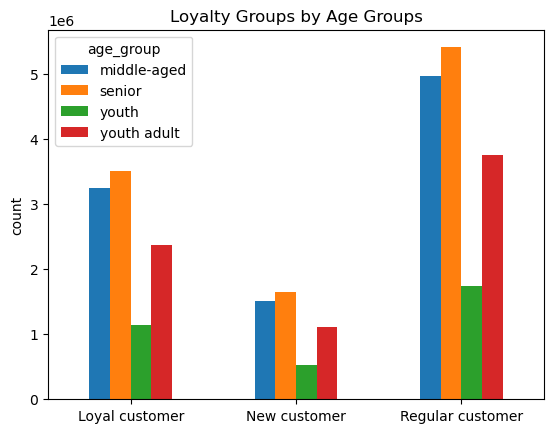

In [99]:
# bar chart
loyalty_age_bar = crosstab_loyalty_age.plot.bar()
plt.title('Loyalty Groups by Age Groups')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [100]:
 # Export the bar chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_group_bar.png'))

### Bar chart - Age groups vs spending habits

In [102]:
# create a crosstab for age group and spending habits

crosstab_age_spending = pd.crosstab(df['age_group'], df['spending_flag'], dropna= False)
crosstab_age_spending

spending_flag,High spender,Low spender
age_group,,
middle-aged,195393,9529557
senior,207168,10367336
youth,66466,3348728
youth adult,134398,7115518


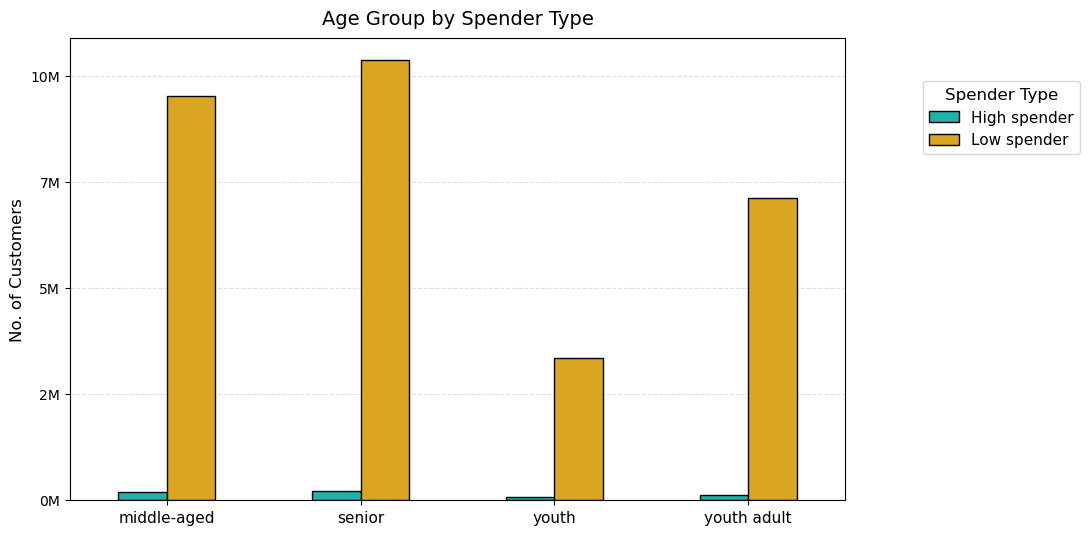

In [493]:
# Define color palette
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen']

# Sort age groups in ascending order
crosstab_age_spending = crosstab_age_spending.sort_index()

# Plot bar chart
age_spending_bar = crosstab_age_spending.plot.bar(color=colors, edgecolor='black', figsize=(10, 6))

# Add gridlines and improve readability
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='lightgray', linestyle='dashed', alpha=0.7)

# Customize legend
leg = plt.legend(loc=(1.1, 0.75), title='Spender Type', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Improve title and labels
plt.title('Age Group by Spender Type', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('No. of Customers', fontsize=12)

# Use "millions (M)" format for y-axis
plt.yticks(np.arange(0, 12000000, 2500000), 
           [f"{int(value/1e6)}M" for value in np.arange(0, 12000000, 2500000)])

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=11)

# Export the bar chart with higher quality
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spending_group_bar.png'),
            dpi=300, bbox_inches='tight')

# Show plot
plt.show()

### Bar chart - Products ordered by department

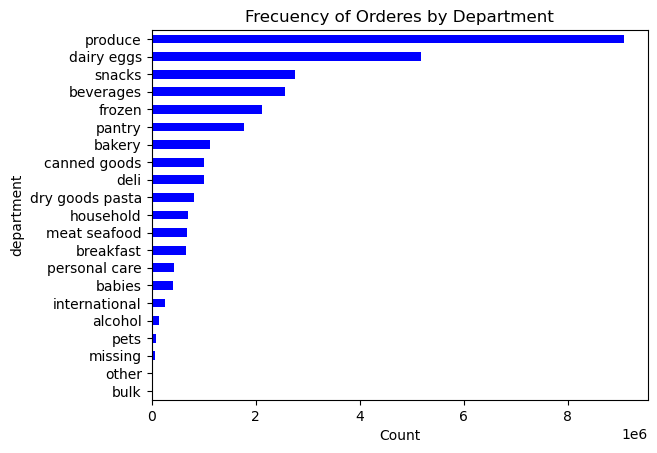

In [499]:
# bar chart frequency of orders vs department
depts_bar = df['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Frecuency of Orderes by Department')

In [501]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

In [184]:
# crosstab with department and income group

crosstab_dept_income = pd.crosstab(df['department'],df['income_group'], dropna=False)
crosstab_dept_income['Total'] = crosstab_dept_income.sum(axis=1)
crosstab_dept_income = crosstab_dept_income.sort_values(by='Total', ascending=False)

print(crosstab_dept_income)

income_group     high-income  low-income  middle-income    Total
department                                                      
produce              6720570       46104        2312599  9079273
dairy eggs           3813356       28400        1335426  5177182
snacks               1745268       34858         986280  2766406
beverages            1767648       23403         780850  2571901
frozen               1557459       12797         551475  2121731
pantry               1319816        8731         454158  1782705
bakery                828150        6023         286655  1120828
canned goods          763543        4206         244325  1012074
deli                  729993        6505         267336  1003834
dry goods pasta       621405        3947         196784   822136
household             499010        4729         196118   699857
meat seafood          529488        1568         143725   674781
breakfast             466648        4802         199400   670850
personal care         305

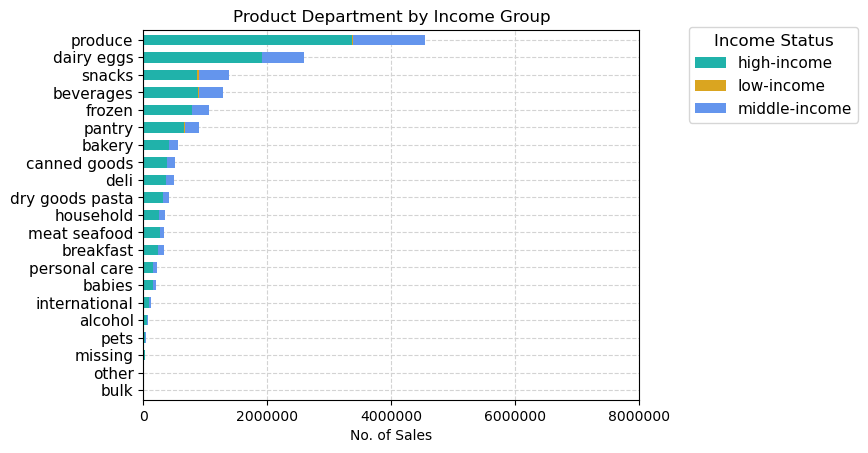

In [511]:
#Sort crosstab in ascending order by total count
crosstab_dept_income['Total'] = crosstab_dept_income.sum(axis=1)  # Add total column
crosstab_dept_income = crosstab_dept_income.sort_values(by='Total', ascending=True).drop(columns=['Total'])  # Sort & drop total

# Define colors
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot the horizontal stacked bar chart
dept_income_bar = crosstab_dept_income.plot.barh(color=colors, stacked=True, width=0.6)

# Customize legend
leg = plt.legend(loc=(1.1, 0.75), title='Income Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Enhance visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.title('Product Department by Income Group')
plt.ylabel('', weight='black')
plt.xlabel('No. of Sales')

# Customize X-axis ticks
plt.xticks(np.arange(0, 20000000, 4000000), 
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 10000000, 2000000)])
plt.yticks(fontsize=11)

# Show the plot
plt.show()
dept_income_bar.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'depart_by_income_bar.png'), 
    dpi=300, bbox_inches='tight')

### Dependants status vs Products ordered by Department

In [223]:
# Crosstab with department and dependents flag
crosstab_dept_dependant = pd.crosstab( df['department'], df['dependents_flag'], dropna = False)


In [224]:
crosstab_dept_dependant

dependents_flag,has dependents,no dependents
department,,
alcohol,107800,36827
babies,307064,103328
bakery,839433,281395
beverages,1926560,645341
breakfast,504418,166432
bulk,25451,8000
canned goods,761054,251020
dairy eggs,3882806,1294376
deli,750452,253382


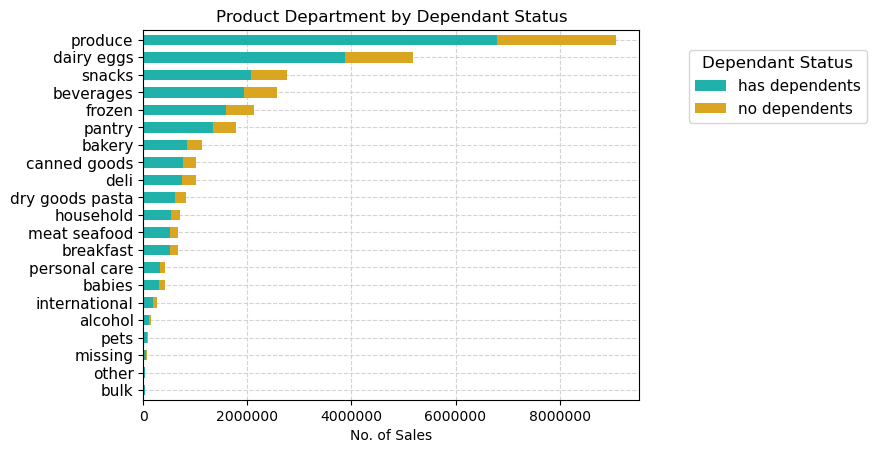

In [225]:
# Sorting the crosstab by total count in ascending order
crosstab_dept_dependant['Total'] = crosstab_dept_dependant.sum(axis=1)  # Add a total column
crosstab_dept_dependant = crosstab_dept_dependant.sort_values(by='Total', ascending=True).drop(columns=['Total'])  # Sort in ascending order and drop total

# Define colors
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot the horizontal stacked bar chart
dept_dependant_bar = crosstab_dept_dependant.plot.barh(color=colors, stacked=True, width=0.6)

# Customize legend
leg = plt.legend(loc=(1.1, 0.75), title='Dependant Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Enhance visualization
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.title('Product Department by Dependant Status')
plt.ylabel('', weight='black')
plt.xlabel('No. of Sales')

# Customize X-axis ticks
plt.xticks(np.arange(0, 10000000, 2000000), 
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 10000000, 2000000)])
plt.yticks(fontsize=11)

# Show the plot
plt.show()

In [290]:
# Export the bar chart
dept_dependant_bar.figure.savefig(os.path.join( path, '04 analysis' , 'Visualizations' , 'depart_dependant_bar.png'))

### Bar chart - Top 3 Departments by Region

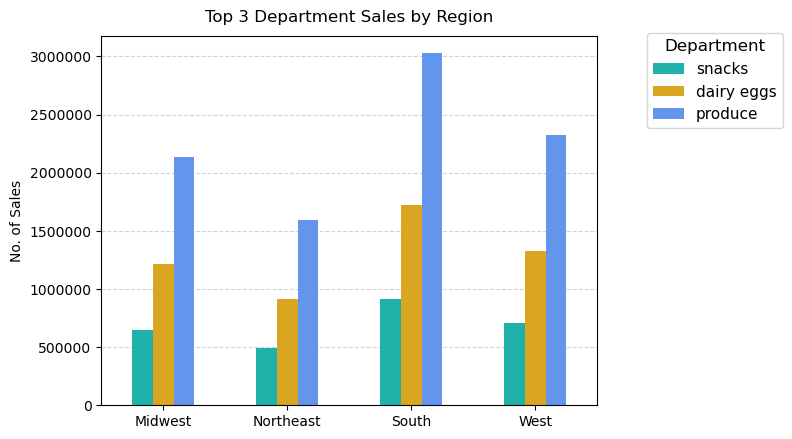

In [276]:

# Get top 3 departments per region and sort in ascending order
top_departments_bar = (
    df.groupby(df['region'])['department']
    .value_counts()
    .groupby('region')
    .head(3)
    .sort_values(ascending=True)  # Sorting in ascending order
    .unstack()
)

# Define colors
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot the bar chart
top_departments_bar.plot.bar(color=colors)

# Customize legend
leg = plt.legend(loc=(1.1, 0.75), title='Department', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Enhance visualization
plt.title('Top 3 Department Sales by Region', pad=10)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No. of Sales')

# Customize Y-axis ticks
plt.yticks(np.arange(0, 3500000, 500000), 
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 3500000, 500000)])

plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Show the plot
plt.show()




Bar Chart - top 3 department sales by region

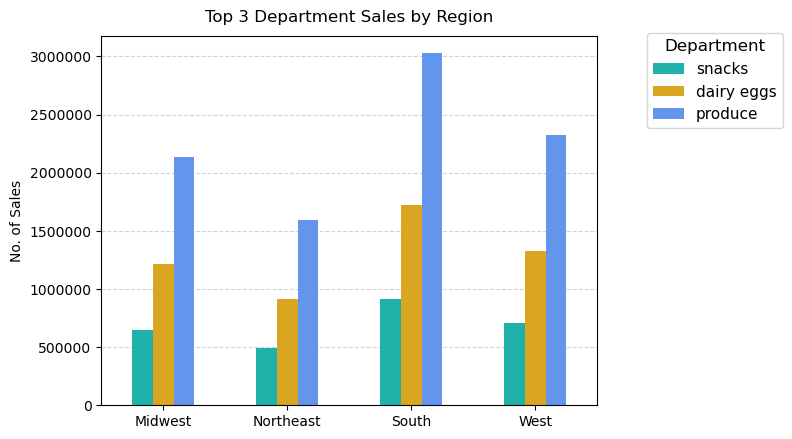

In [581]:
# Get top 3 departments per region and sort in ascending order
top_3_dept = (
    df.groupby(df['region'])['department']
    .value_counts()
    .groupby('region')
    .head(3)
    .sort_values(ascending=True)  # Sorting in ascending order
    .unstack()
)

# Define colors
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot the bar chart
top_3_dept.plot.bar(color=colors)

# Customize legend
leg = plt.legend(loc=(1.1, 0.75), title='Department', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Enhance visualization
plt.title('Top 3 Department Sales by Region', pad=10)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No. of Sales')

# Customize Y-axis ticks
plt.yticks(np.arange(0, 3500000, 500000), 
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 3500000, 500000)])

plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Save the plot before showing it
plt.savefig(os.path.join(path, '04 analysis', 'Visualizations', 'top_3_dept1.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Histogram chart - Busiest hour of the day 

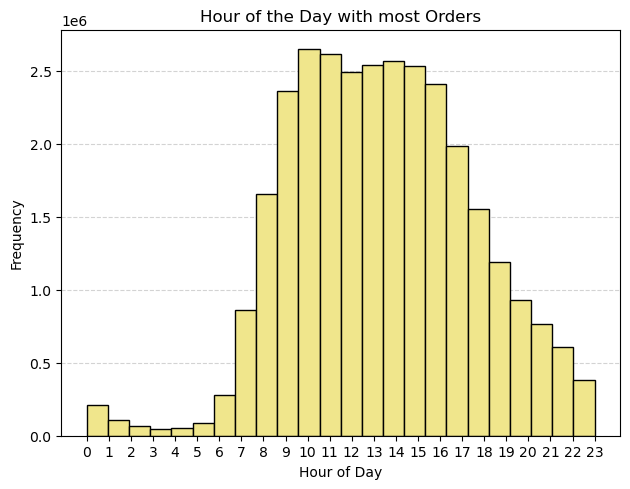

In [548]:
# Create a bar chart showing busiest days of the week

colors = ['khaki']
order_hour_hist = df['order_hour_of_day'].plot.hist(bins=24, edgecolor='black',color=colors)

# set up grid lines behind

plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# formatting

plt.title('Hour of the Day with most Orders')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.tight_layout()  
plt.ylabel('Frequency')
plt.xlabel('Hour of Day')

# export the figure

order_hour_hist.figure.savefig(os.path.join(
    path,'04 Analysis','Visualizations', 'busiest_hour_of_day_hist.png'), dpi=300, bbox_inches='tight')


### Pie chart - Loyalty group distribution

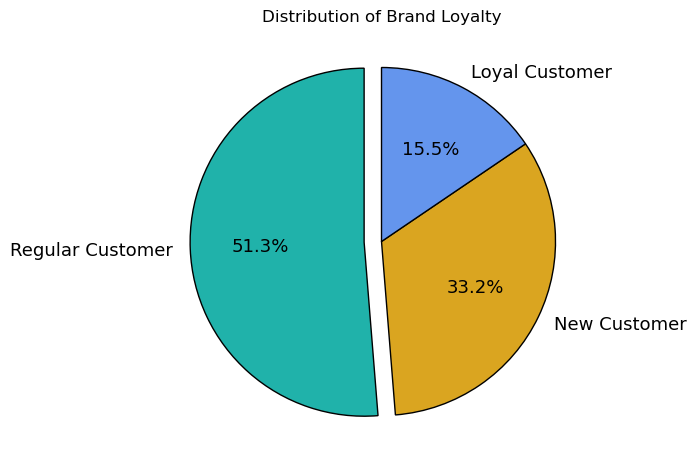

In [340]:
# Define explode 
explode = (0.1, 0, 0)  
# Define colors
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue']

# Plot the pie chart
loyalty_distribution_pie = df['loyalty_flag'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', 
    labels=['Regular Customer', 'New Customer', 'Loyal Customer'], 
    explode=explode, 
    startangle=90,
    fontsize=13,
    wedgeprops={'edgecolor': 'black'}, 
    colors=colors
)

# Formatting
plt.ylabel('')  
plt.title('Distribution of Brand Loyalty', size=12, pad=2)
plt.tight_layout()

# Export the chart
loyalty_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'loyalty_distribution_pie.png'
))

### Pie chart - Marital status distribution

In [345]:
# create a dataframe 
fam_status = df['marital_status'].value_counts(dropna = False)
fam_status

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

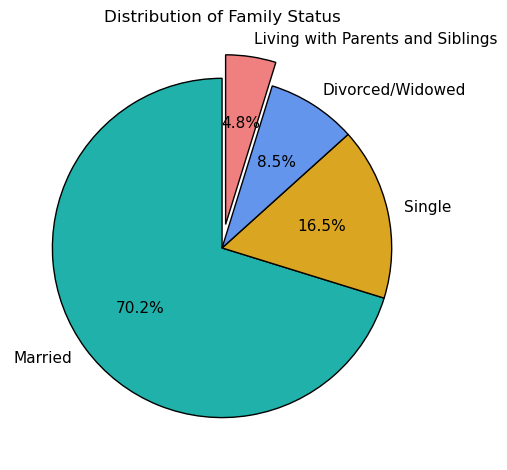

In [472]:
# Set up explode 
explode = [0, 0, 0, 0.14]  # Highlighting 'living with parents and siblings'

# Define colors 
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral']  # You can adjust these as needed

# Plot the pie chart
fam_status_distribution_pie = fam_status.plot.pie(
    autopct='%1.1f%%', 
    labels=['Married', 'Single', 'Divorced/Widowed', 'Living with Parents and Siblings'], 
    explode=explode, 
    startangle=90,
    fontsize=11, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'}  # Adds black edges to the slices
)

# Formatting
plt.ylabel('')  
plt.title('Distribution of Family Status', size=12, pad=10)
plt.tight_layout()

# Export the figure
fam_status_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'marital_distribution_pie.png'
))

### Aggregate the max, mean, and min variables on a customer-profile level

In [475]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df.groupby(['user_id', 'gender', 'state', 'region', 'number_dependents', 'marital_status', 'age_group', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'order_frequency_flag', 'dependents_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [476]:
customer_profile.head()

,user_id,gender,state,region,number_dependents,marital_status,age_group,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,order_frequency_flag,dependents_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,youth adult,1,2,8,New customer,Non-frequent customer,has dependents,middle-income,Low spender,31.6
1,1,Female,Alabama,South,3,married,youth adult,2,3,7,New customer,Non-frequent customer,has dependents,middle-income,Low spender,35.4
2,1,Female,Alabama,South,3,married,youth adult,3,3,12,New customer,Non-frequent customer,has dependents,middle-income,Low spender,28.2
3,1,Female,Alabama,South,3,married,youth adult,4,4,7,New customer,Non-frequent customer,has dependents,middle-income,Low spender,26.0
4,1,Female,Alabama,South,3,married,youth adult,5,4,15,New customer,Non-frequent customer,has dependents,middle-income,Low spender,57.0


### Aggregate variables for customer profiles for expenditure

In [479]:
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
2                 14   1   7.5  213.1   19.0  104.685714
3                 12   1   6.5  107.2   30.7   60.116667
4                  5   1   3.0   63.4   10.8   29.540000
7                 20   1  10.5  166.7    6.3   76.910000
...              ...  ..   ...    ...    ...         ...
206203             5   1   3.0  216.3  126.6  169.900000
206206            67   1  34.0  157.3    9.6   32.526866
206207            16   1   8.5  200.8   42.8  101.931250
206208            49   1  25.0  238.5   38.7  115.595918
206209            13   1   7.0  131.5   11.1   70.046154

[162631 rows x 6 columns]

### Customer Profiles & Expenditure Analysis

In [452]:
customer_agg = customer_profile.groupby('user_id').agg({
    'order_number': ['max', 'min', 'mean'],  # Track order frequency for each customer
    'prices': ['max', 'min', 'mean']  # Analyze customer spending habits
}).reset_index()

# Rename columns for clarity
customer_agg.columns = ['user_id', 'max_orders', 'min_orders', 'avg_orders', 'max_spend', 'min_spend', 'avg_spend']

# Display sample of the aggregated dataset
customer_agg.head()

,user_id,max_orders,min_orders,avg_orders,max_spend,min_spend,avg_spend
0,1,10,1,5.5,63.1,25.0,37.570000
1,2,14,1,7.5,213.1,19.0,104.685714
2,3,12,1,6.5,107.2,30.7,60.116667
3,4,5,1,3.0,63.4,10.8,29.540000
4,7,20,1,10.5,166.7,6.3,76.910000


### Compare customer profiles with regions and departments

In [455]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df['region'], df['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


### Bar chart - order by day of the week

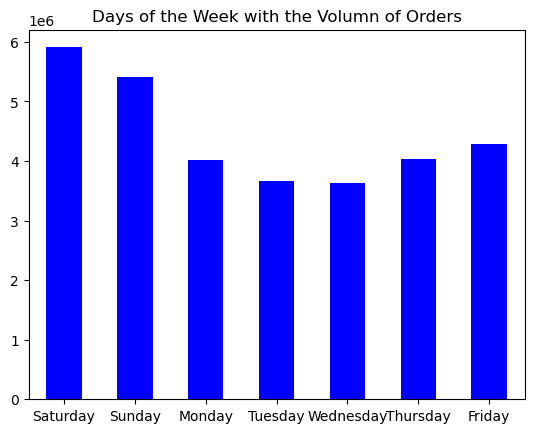

In [550]:
# Create the bar chart for orders by day of the week
orders_dow_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color='blue')

# Set chart title
orders_dow_bar.set_title('Days of the Week with the Volumn of Orders')

# Set custom x-tick labels for days of the week
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)

# Set x and y labels
orders_dow_bar.set_xlabel('')

# Export the bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_dayoftheweek_bar.png'))

### bar chart - Department Distribution by Region

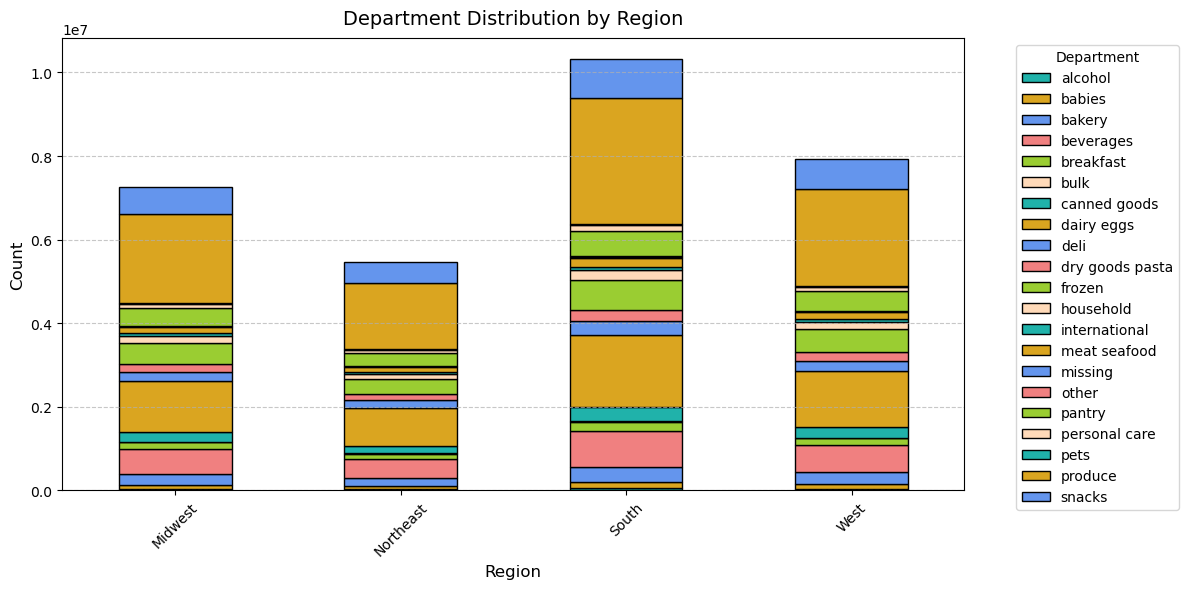

In [464]:
# Define color palette
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot stacked bar chart
region_dept_cross.plot(kind='bar', stacked=True, color=colors, figsize=(12,6), edgecolor='black')

# Improve aesthetics
plt.title('Department Distribution by Region', fontsize=14, pad=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='dashed', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [466]:

# Aggregate customer profile by region and department
customer_profile = df.groupby([
    'user_id', 'gender', 'region', 'department', 'age_group', 'income_group',
    'loyalty_flag', 'order_frequency_flag', 'spending_flag'
])['prices'].sum().reset_index()

# Aggregate total spending & order frequency per user
customer_agg = customer_profile.groupby(['region', 'department']).agg({
    'prices': ['sum', 'mean'],  # Total and average spending
    'user_id': 'count'  # Number of customers
}).reset_index()

# Rename columns for clarity
customer_agg.columns = ['region', 'department', 'total_spent', 'avg_spent_per_customer', 'customer_count']

# Display data
customer_agg.head()

,region,department,total_spent,avg_spent_per_customer,customer_count
0,Midwest,alcohol,276848.1,89.827417,3082
1,Midwest,babies,728255.6,101.076419,7205
2,Midwest,bakery,2058264.6,73.026951,28185
3,Midwest,beverages,4603242.9,136.412591,33745
4,Midwest,breakfast,1252947.3,53.855461,23265


In [490]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_complete.pkl'))

### Stacked bar chart - Age group vs Products ordered by department

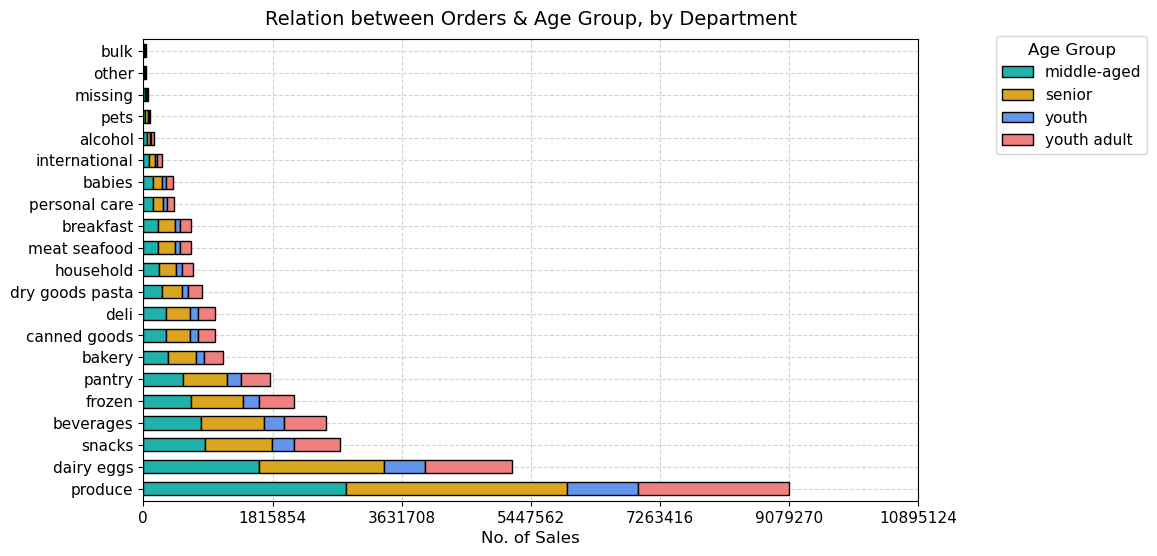

In [537]:
# Create a crosstab for department vs age group
dept_age_cross = pd.crosstab(df['department'], df['age_group'], dropna=False)

# Add a total column to sum values across each row (department)
dept_age_cross['Total'] = dept_age_cross.sum(axis=1)

# Sort the DataFrame based on the total sales in descending order
dept_age_cross = dept_age_cross.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Define colors for the stacked bar chart
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot horizontal stacked bar chart
dept_age_bar = dept_age_cross.plot.barh(color=colors, stacked=True, width=0.6, figsize=(10, 6), edgecolor='black')

# Customize the legend
leg = plt.legend(loc=(1.1, 0.75), title='Age Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Set grid behind bars
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Enhance chart formatting
plt.title('Relation between Orders & Age Group, by Department', fontsize=14, pad=10)
plt.xlabel('No. of Sales', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add dynamic x-ticks based on the data range
max_value = dept_age_cross.sum(axis=1).max()
tick_step = max_value // 5  # Dynamic step size for better scaling
plt.xticks(np.arange(0, max_value + tick_step, tick_step), 
           [int(value) for value in np.arange(0, max_value + tick_step, tick_step)])

# Export the chart
dept_age_bar.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'age_order_department_bar.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Stacked Bar chart - Marital status vs Products ordered by department 

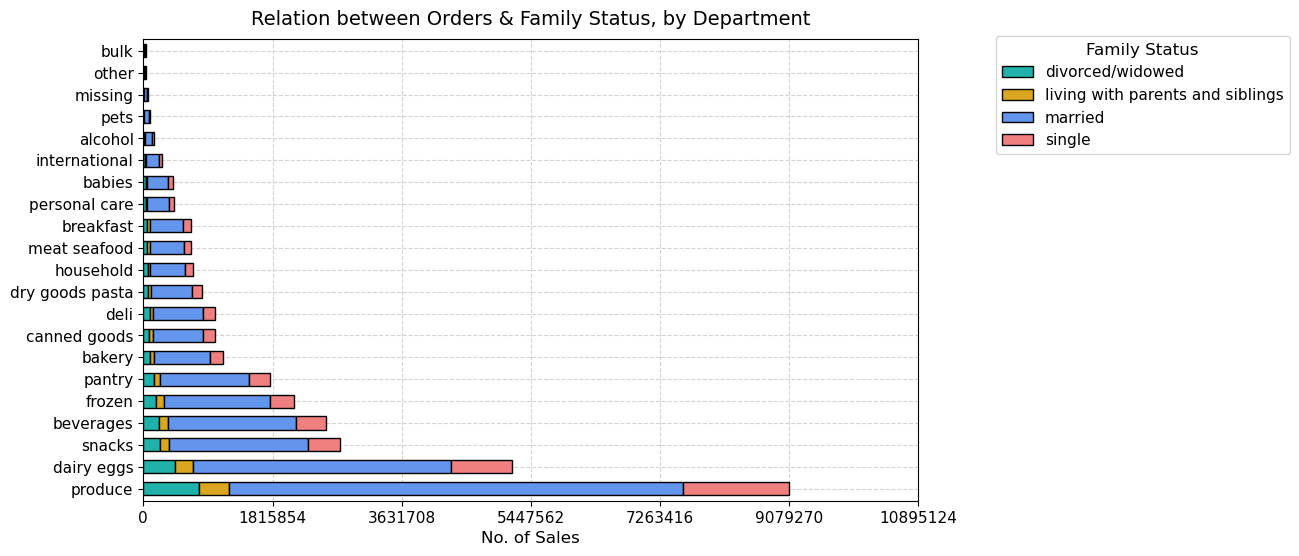

In [539]:
# Create a crosstab for department vs marital status
dept_marital_cross = pd.crosstab(df['department'], df['marital_status'], dropna=False)

# Add a total column to sum values across each row (department)
dept_marital_cross['Total'] = dept_marital_cross.sum(axis=1)

# Sort the DataFrame based on the total sales in descending order
dept_marital_cross = dept_marital_cross.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Define colors for the stacked bar chart
colors = ['lightseagreen', 'goldenrod', 'cornflowerblue', 'lightcoral', 'yellowgreen', 'peachpuff']

# Plot horizontal stacked bar chart
dept_marital_bar = dept_marital_cross.plot.barh(color=colors, stacked=True, width=0.6, figsize=(10, 6), edgecolor='black')

# Customize the legend
leg = plt.legend(loc=(1.1, 0.75), title='Family Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Set grid behind bars
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Enhance chart formatting
plt.title('Relation between Orders & Family Status, by Department', fontsize=14, pad=10)
plt.xlabel('No. of Sales', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add dynamic x-ticks based on the data range
max_value = dept_marital_cross.sum(axis=1).max()
tick_step = max_value // 5  # Dynamic step size for better scaling
plt.xticks(np.arange(0, max_value + tick_step, tick_step), 
           [int(value) for value in np.arange(0, max_value + tick_step, tick_step)])

# Export the chart
dept_marital_bar.figure.savefig(os.path.join(
    path, '04 analysis', 'Visualizations', 'marital_order_department_bar.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Pie chart - Price range distribution

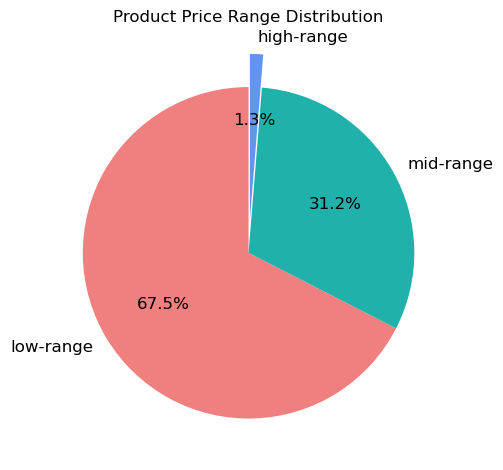

In [557]:
# Set up color palette
explode = [0 , 0 , 0.2]  # Highlight the third slice
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a pie chart
region_distribution_pie = df['price_range_loc'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', labels=['low-range', 'mid-range', 'high-range'], explode=explode, 
    startangle=90, fontsize=12, colors=colors)

# Formatting
plt.ylabel('')  
plt.title('Product Price Range Distribution', pad=17)
plt.tight_layout()

# Export the chart
region_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis', 'Visualizations', 'Price_range_distribution_pie.png'), dpi=300, bbox_inches='tight')

### Scattter Plot of Age vs Income


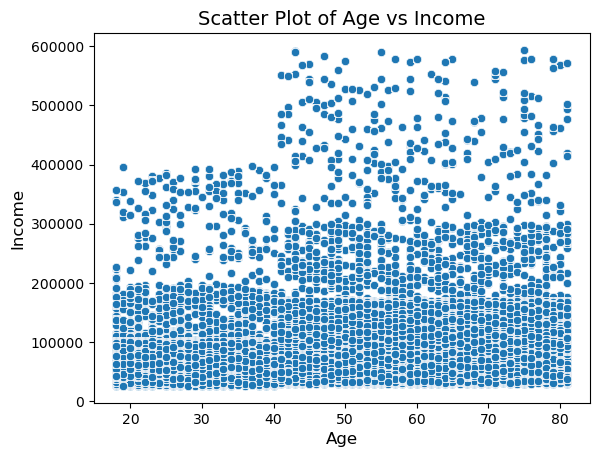

In [589]:
# Creating the scatter plot
scatter = sns.scatterplot(x='age', y='income', data=df)

# Adding title and labels for better readability
scatter.set_title('Scatter Plot of Age vs Income', fontsize=14)
scatter.set_xlabel('Age', fontsize=12)
scatter.set_ylabel('Income', fontsize=12)

# exporting scatterplot - connection between age and spending power (income)
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))

# Show the plot
plt.show()

### Line chart - Total Prices Spent by Hour of Day by Consumer Profile

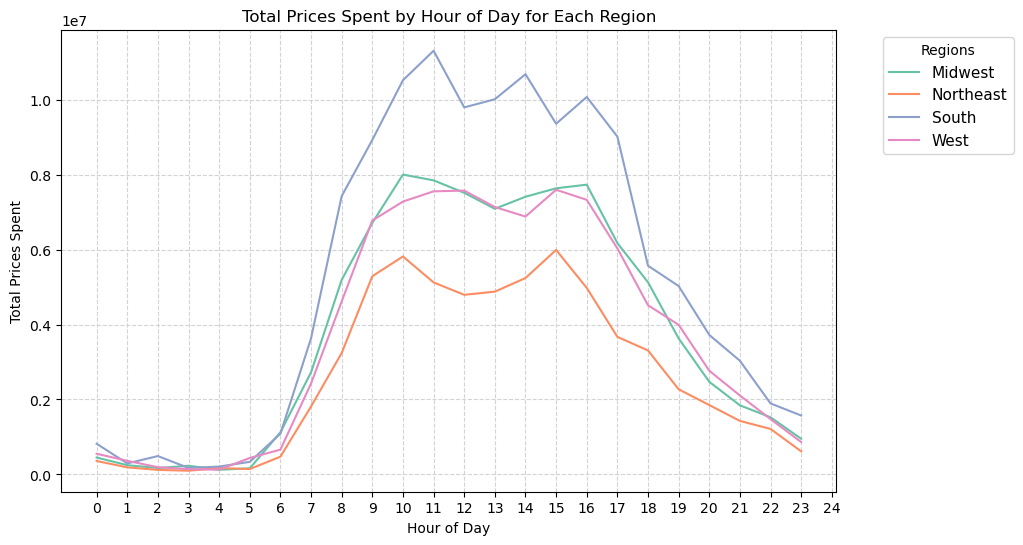

In [605]:
# Custom color palette for regions
colors = sns.color_palette("Set2", len(region_hour_prices['region'].unique()))

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique regions with colors
for i, region in enumerate(region_hour_prices['region'].unique()):
    region_data = region_hour_prices[region_hour_prices['region'] == region]
    plt.plot(region_data['order_hour_of_day'], region_data['prices'], label=f'{region}', 
             linewidth=1.5, color=colors[i])

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day for Each Region')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Adjust xticks for clarity
plt.xticks(np.arange(0, 25, 1))

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_expenditure_HOD_by_region_line.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



### Line chart - Total Prices Spent by Hour of Day by Consumer Profile

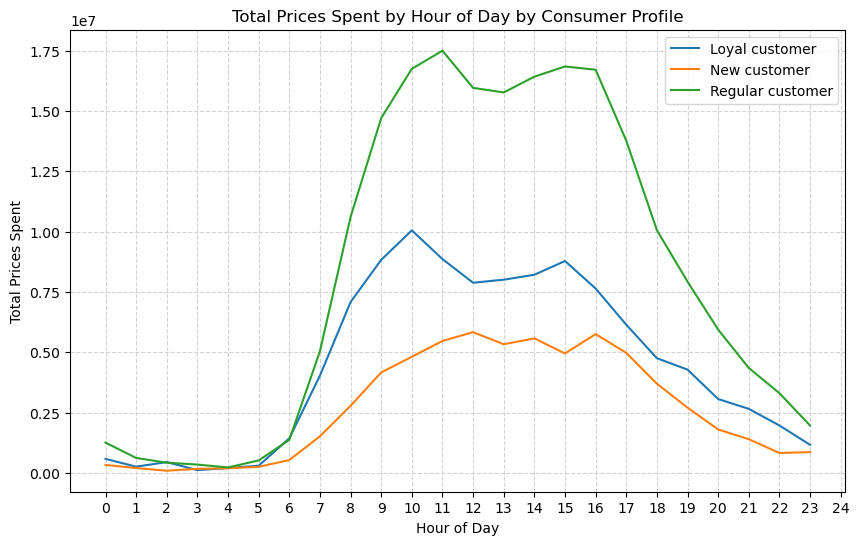

In [617]:
# Group data by dependant and hour of day, and sum the prices
consumer_hour_prices = df.groupby(['loyalty_flag','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique age
for consumer in consumer_hour_prices['loyalty_flag'].unique():
    # Filter data for the current income group
    consumer_data = consumer_hour_prices[consumer_hour_prices['loyalty_flag'] == consumer]
    # Plot the line for the current age group
    plt.plot(consumer_data['order_hour_of_day'], consumer_data['prices'], label=f'{consumer}')

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Consumer Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , 'total_expenditure_HOD_by_consumer_line.png' ), dpi=300 , bbox_inches='tight')

### Bar chart - Price-range products by Hour

<Figure size 1500x1000 with 0 Axes>

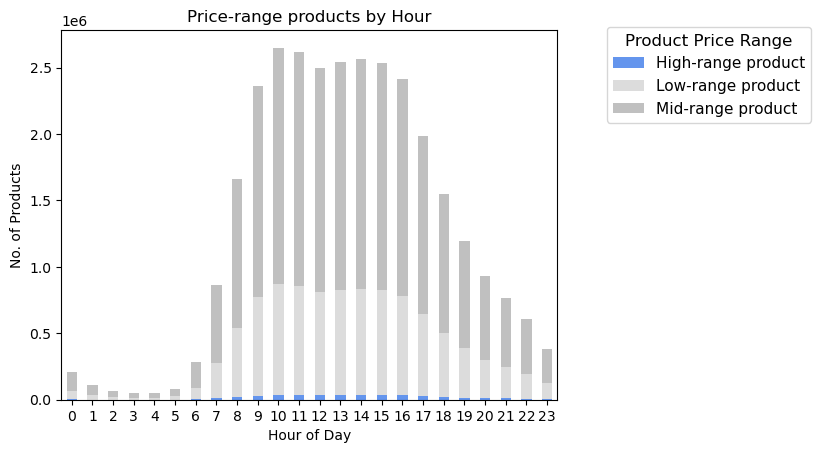

In [624]:
# Plot a bar with crosstab

plt.figure(figsize=(15,10))
order_hod_price_range_cross = pd.crosstab(df['order_hour_of_day'] , df['price_range_loc'], dropna = False).plot.bar(
    stacked=True, color= ['cornflowerblue','gainsboro','silver'])

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Product Price Range',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Price-range products by Hour')
plt.xlabel('Hour of Day')
plt.xticks(rotation=0)
plt.ylabel('No. of Products')


# Export the figure
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , 'hour_price_range_bar.png'), dpi=300 , bbox_inches='tight')

### Bar chart - Order Frequency by Customers Categories

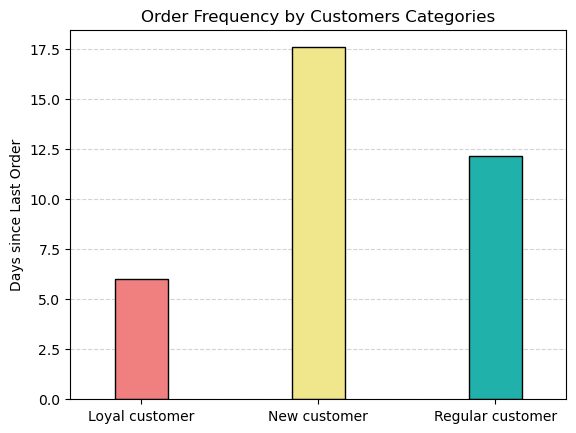

In [631]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
loyalty_avg_usage_bar =df.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.3,color=colors)

# Formatting
plt.title('Order Frequency by Customers Categories')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , 'order_frequency_by_loyalty_bar.png'), dpi=300 , bbox_inches='tight')

### Popular Prodcuts

In [647]:
# Group by 'product_name', count orders and sum prices
product_summary = df.groupby('product_name').agg(
    order_number=('order_number', 'count'),
    prices=('prices', 'sum')
).reset_index()

# Sort the results by descending order 
product_summary_sorted = product_summary.sort_values(by='order_number', ascending=False)

# Display the sorted result
print(product_summary_sorted)

                                       product_name  order_number     prices
3671                                         Banana        453164  5573917.2
3466                         Bag of Organic Bananas        366403  3773950.9
31891                          Organic Strawberries        255988  1868712.4
28812                          Organic Baby Spinach        231772  1900530.4
30269                          Organic Hass Avocado        206799   827196.0
...                                             ...           ...        ...
4774                                Blackberry Flow             1        7.8
15166  Flax Oil, Organic, Omega-3, Original Formula             1        2.4
32572        Organic ZFruit Rope Fruit Punch Flavor             1        1.9
15226       Florentine Spinach & Cheese Pasta Sauce             1       11.3
13448                 Duplex Sandwich Creme Cookies             1        3.5

[49630 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

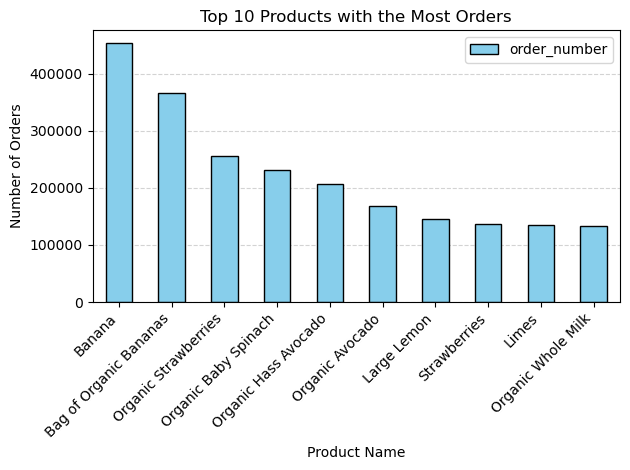

In [662]:
# Get the top 10 products with the most orders
top_10_products = product_summary_sorted.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_10_products.plot.bar(x='product_name', y='order_number', color='skyblue', edgecolor='black')

# Customize chart
plt.title('Top 10 Products with the Most Orders')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate product names for better readability
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Show the plot
plt.tight_layout()

# Save the plot if needed
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_products_orders_bar.png'), dpi=300, bbox_inches='tight')
plt.show()

In [664]:
# Group by 'product_name', count orders and sum prices
product_summary_price = df.groupby('product_name').agg(
    order_number=('order_number', 'count'),
    prices=('prices', 'sum')
).reset_index()

# Sort the results by descending order
product_summary_price_sorted = product_summary.sort_values(by='prices', ascending=False)

# Display the sorted result
print(product_summary_price_sorted)

                           product_name  order_number      prices
601               2 % Reduced Fat  Milk           654  65399346.0
23888  Lowfat 2% Milkfat Cottage Cheese          4223  62922700.0
3671                             Banana        453164   5573917.2
3466             Bag of Organic Bananas        366403   3773950.9
22388                       Large Lemon        145397   2035558.0
...                                 ...           ...         ...
33008                    Original Jerky             1         1.5
5316               Bourbon Vanilla Bean             1         1.4
44937      Tikka Masala Simmering Sauce             1         1.4
7100                Chardonnay Carneros             1         1.3
17690           Glycerine Soap Cucumber             1         1.1

[49630 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

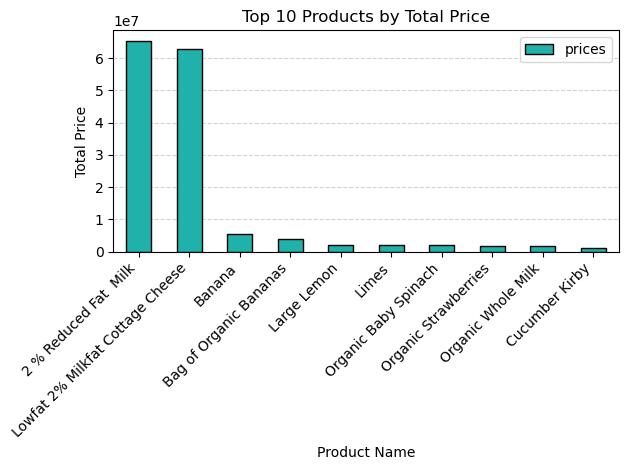

In [672]:
# Create a bar chart for the top products by total price
top_products = product_summary_price_sorted.head(10)  # Selecting the top 10 products

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Bar chart for 'prices'
top_products.plot.bar(x='product_name', y='prices', color='lightseagreen', edgecolor='black')

# Customize chart
plt.title('Top 10 Products by Total Price')
plt.xlabel('Product Name')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right')  # Rotate product names for better readability
plt.gca().set_axisbelow(True) 
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Show the plot
plt.tight_layout()

# Save the plot if needed
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_10_products_total_price_bar.png'), dpi=300, bbox_inches='tight')
plt.show()

In [674]:
product_summary_price_sorted.head(10)

,product_name,order_number,prices
601,2 % Reduced Fat Milk,654,65399346.0
23888,Lowfat 2% Milkfat Cottage Cheese,4223,62922700.0
3671,Banana,453164,5573917.2
3466,Bag of Organic Bananas,366403,3773950.9
22388,Large Lemon,145397,2035558.0
23395,Limes,134751,1980839.7
28812,Organic Baby Spinach,231772,1900530.4
31891,Organic Strawberries,255988,1868712.4
32448,Organic Whole Milk,133514,1708979.2
11619,Cucumber Kirby,92612,1222478.4


In [676]:
list(df.columns.values)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'match',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency_flag',
 'first_name',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_dependents',
 'marital_status',
 'income',
 'department',
 'created',
 'region',
 'activity_flag',
 'income_group',
 'age_group',
 'dependents_flag']

In [678]:
# Group by 'order_id' and 'region', summing the prices
order_summary = df.groupby(['order_id', 'region']).agg(
    total_price=('prices', 'sum')
).reset_index()

# Sort results by total price in descending order
order_summary_sorted = order_summary.sort_values(by='total_price', ascending=False)

# Display the sorted result
print(order_summary_sorted)

         order_id     region  total_price
1701852   1900188      South     100452.9
809362     903678      South     100442.8
1975658   2205897    Midwest     100403.8
964933    1077441       West     100384.5
1083699   1209979    Midwest     100353.0
...           ...        ...          ...
1494509   1668770    Midwest          1.0
2027608   2263884       West          1.0
222236     247980  Northeast          1.0
1151223   1285291      South          1.0
29189       32547       West          1.0

[3064375 rows x 3 columns]


In [682]:
order_summary_sorted.head(150)

,order_id,region,total_price
1701852,1900188,South,100452.9
809362,903678,South,100442.8
1975658,2205897,Midwest,100403.8
964933,1077441,West,100384.5
1083699,1209979,Midwest,100353.0
...,...,...,...
2156673,2407949,South,100176.4
422785,471824,South,100175.8
688494,768800,Midwest,100175.8
385211,429893,Midwest,100174.6


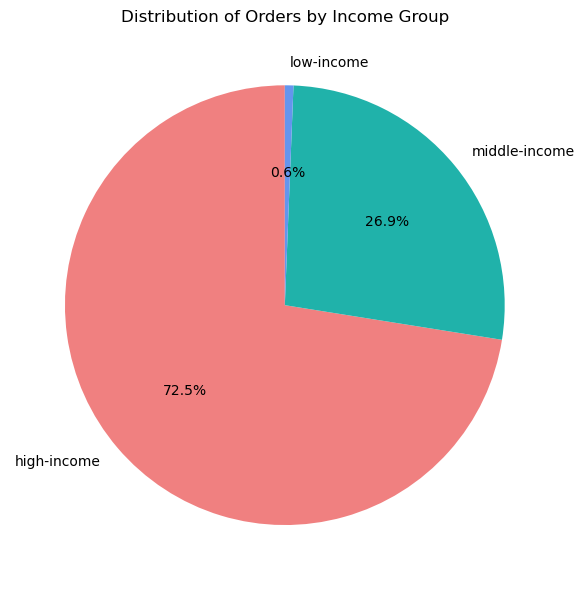

In [684]:
# Count the number of orders per income group
income_group_counts = df['income_group'].value_counts()

# Define colors for better visualization
colors = ['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen', 'peachpuff']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Formatting
plt.title('Distribution of Orders by Income Group')
plt.ylabel('')  
plt.tight_layout()

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_pie.png'), dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

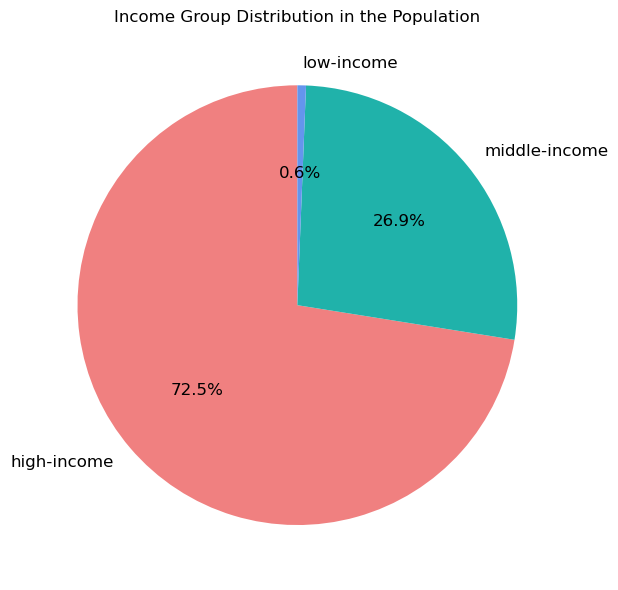

In [686]:
# Count occurrences of each income group
income_group_distribution = df['income_group'].value_counts(normalize=True) * 100  # Convert to percentage

# Define colors for better visualization
colors = ['lightcoral', 'lightseagreen', 'cornflowerblue']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(income_group_distribution, labels=income_group_distribution.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12})

# Formatting
plt.title('Income Group Distribution in the Population')
plt.ylabel('')  
plt.tight_layout()

# Export the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_distribution_pie.png'), 
            dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
